### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

### YU Lingfeng Submission 1
## <a id = "top">Table of Content</a>

### [1. Question 1](#p1)
- ##### [1.1 functions](#p11)
- ##### [1.2 Results](#p12)

### [2. Question 2](#p2)
- ##### [2.1 Answers](#p21)
- ##### [2.2 Counter-checks](#p22)

### [3. Question 3](#p3)
- ##### [3.1 functions](#p31)
- ##### [3.2 Results](#p32)

In [1]:
from enum import Enum
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## <a id = "p1"> 1. </a> Question 1 [back to table of contents](#top)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


##### <a id = "p11"> </a> 1.1 function definition [back to table of contents](#top)

In [2]:
def toFixedPoint(x : float, w : int, b : int) -> [int]:
    # set a[w-1] to 1 if x < 0, otherwise set a[w-1] to 0
    a = [0 for i in range(w)]
    if x < 0:
        a[0] = 1
        x += 2**(w-1-b)
        
    if int(x * (2**b)) < x * (2**b):
        raise ValueError\
        ('fixed<' + str(w) + "," + str(b) +\
        "> is not precise enough to represent " +\
        str(x))        
        
    for i in range(1, w):
        y = x / (2**(w-1-i-b))
#         print(y)
        if int(y) > 1:
            raise OverflowError\
            ('fixed<' + str(w) + "," + str(b) +\
             "> is not sufficient to represent " +\
             str(x))

        a[i] = int(y) # % 2  # round y down to integer
        x -= a[i] * (2**(w-1-i-b))
    return a

In [3]:
# toFixedPoint(9.25, 8, 0) # precision error

In [4]:
# toFixedPoint(9.25, 8, 4) # overflow error

In [5]:
def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
# w: width of the binary representation
# b: binary point
    if w != len(bits):
        raise ValueError\
        ('expected width of fixed<' + str(w) + "," + str(b) +\
        "> does not tally with input binary number " +\
        str(bits))         
    x = -bits[0] * (2**(w-1-b))
    for i in range(1, w):
        if bits[i] != 0 and bits[i] != 1:
            raise ValueError\
            ('expected input binary number ' +\
            str(bits) + ' shall only contain 0 and 1')              
        x += bits[i] * (2**(w-1-i-b))   

    return x

In [6]:
# fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]) # length error

In [7]:
# fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0.1]) # digit error

##### <a id = "p12"> </a> 1.2 Test Results [back to table of contents](#top)

In [8]:
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

44.75

In [9]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

-13.28125

In [10]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-21.25

## <a id = "p2"> 2. </a> Question 2 [back to table of contents](#top)

In [11]:
# import math
# from enum import Enum

2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

> Two Step Binomial Tree

#### at time $t_0$
* $S_0$ with probability 1
#### at time $t_1$
* $S_{1,u} = u\cdot S_0$ with probability $P_u =p$
* $S_{1,d} = d\cdot S_0$ with probability $P_d = q = 1-p$
#### at time $t_2$
* $S_{2,uu} = u\cdot S_{1,u} = u^2\cdot S_0$ with probability $P_{uu} =p^2$
* $S_{2,ud} = u\cdot S_{1,d}= d\cdot S_{1,u}= d\cdot u\cdot S_0 = S_0$ with probability $P_{ud} =2\cdot p\cdot(1-p)$
* $S_{2,dd} = d\cdot S_{1,d} = d^2\cdot S_0$ with probability $P_{dd} =(1-p)^2$

#### by matching the Distribution of $S_T$ in both $Binomial$ $Tree$ and $Black$-$Scholes$
###  $u = \frac{b+\sqrt {b^2-4}}{2}$, $d = \frac{b-\sqrt {b^2-4}}{2} = \frac{1}{u}$ where $b=e^{r\cdot \Delta t+\sigma^2 \cdot \Delta t}+e^{-r\cdot \Delta t}$
### $p=\frac{S_0e^{r\Delta t} - dS_0}{uS_0 -dS_0}=\frac{e^{r\Delta t}-d}{u-d}$ where $\Delta t = \frac{T}{N}$

The price for $European$ option is calculated by two-step binomial tree is

$Price =e^{-rT}\cdot (P_{uu}\cdot Payoff(S_{2,uu})+P_{ud}\cdot Payoff (S_{2,ud})+P_{dd}\cdot Payoff(S_{2,dd}))$

##### <a id = "p21"> </a> 2.1 Answers [back to table of contents](#top)

>a. European call option $C_a$ with $S_0 = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$, $(N = 2)$

$\Delta t = \frac{T}{N}=\frac{1}{2}=0.5$

$b=e^{r\cdot \Delta t+\sigma^2 \cdot \Delta t}+e^{-r\cdot \Delta t} $

$=e^{0.03\cdot 0.5+0.2^2 \cdot 0.5}+e^{-0.03\cdot 0.5} $

$=2.020731648402686$

$u = \frac{b+\sqrt {b^2-4}}{2}=1.1547233619818793$

$d = \frac{1}{u} = 0.8660082864208065$

$p=\frac{e^{r\Delta t}-d}{u-d}=\frac{e^{0.03 \cdot 0.5}-d}{u-d}= 0.5164426481892243$

## at time $T$
$V[S_{2,uu}]=max[S_{2,uu}-K, 0]$

$=max[100* 1.1547233619818793^2-105, 0] $

$= 28.338604270673443$

$V[S_{2,ud}]=max[S_{2,ud}-K, 0]=max[100-105, 0]=0$

$V[S_{2,dd}]=max[S_{2,dd}-K, 0]$

$=max[100* 1.1547233619818793^{-2}-105, 0] =0$
## at time $\frac{T}{2}$

$V[S_{1,u}]=e^{-r\Delta t}(P_u \cdot V[S_{2,uu}]+P_d \cdot V[S_{2,ud}])$

$=e^{-0.03* 0.5}(0.5164426481892243* 28.338604270673443+0)$

$=14.417373143624523$

$V[S_{1,d}]=e^{-r\Delta t}(P_u \cdot V[S_{2,ud}]+P_d \cdot V[S_{2,dd}])$

$=e^{-0.03* 0.5}(0+0)=0$
## at time $0$

$C_a=e^{-r\Delta t}(P_u \cdot V[S_{1,u}]+P_d \cdot V[S_{1,d}])$

$=e^{-0.03* 0.5}(0.5164426481892243*14.417373143624523+0)$

<font color="red"> $C_a=7.334893644625006$

In [12]:
S, K, r, T, sigma, N = 100, 105, 0.03, 1, 0.2, 2
b=math.exp(r*T/N+sigma*sigma*T/N)+math.exp(-r*T/N)
u=(1/2)*(b+math.sqrt(b*b-4));d=1/u;p=(math.exp(r*T/N)-d)/(u-d);q=1-p
C_a=(p*p*max(u*u*S-K, 0)+2*p*q*max(u*d*S-K,0)+q*q*max(d*d*S-K,0))*math.exp(-r*T)
print(C_a);b,u,d,p

7.334893644625006


(2.020731648402686, 1.1547233619818793, 0.8660082864208065, 0.5164426481892243)

>b. European put option $P_b$ with $S_0 = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$, $(N = 2)$

$\Delta t = \frac{T}{N}=\frac{1}{2}=0.5$

$b=e^{r\cdot \Delta t+\sigma^2 \cdot \Delta t}+e^{-r\cdot \Delta t} $

$=e^{0.03\cdot 0.5+0.2^2 \cdot 0.5}+e^{-0.03\cdot 0.5} $

$=2.020731648402686$

$u = \frac{b+\sqrt {b^2-4}}{2}=1.1547233619818793$

$d = \frac{1}{u} = 0.8660082864208065$

$p=\frac{e^{r\Delta t}-d}{u-d}=\frac{e^{0.03 \cdot 0.5}-d}{u-d}= 0.5164426481892243$

## at time $T$
$V[S_{2,uu}]=max[K-S_{2,uu}, 0]$

$=max[105-100* 1.1547233619818793^2, 0] $

$= 0$

$V[S_{2,ud}]=max[K-S_{2,ud}, 0]=max[105-100, 0]=5$

$V[S_{2,dd}]=max[K-S_{2,dd}, 0]$

$=max[105-100* 1.1547233619818793^{-2}, 0] $

$=30.002964785049826$

## at time $\frac{T}{2}$

$V[S_{1,u}]=e^{-r\Delta t}(P_u \cdot V[S_{2,uu}]+P_d \cdot V[S_{2,ud}])$

$=e^{-0.03* 0.5}(0+(1-0.5164426481892243)*5)$

$=2.3817906037581693$

$V[S_{1,d}]=e^{-r\Delta t}(P_u \cdot V[S_{2,ud}]+P_d \cdot V[S_{2,dd}])$

$=e^{-0.03* 0.5}(0.5164426481892243*5$

$+(1-0.5164426481892243)*30.002964785049826)$

$=16.835925016240928$

## at time $0$

$P_b=e^{-r\Delta t}(P_u \cdot V[S_{1,u}]+P_d \cdot V[S_{1,d}])$

$=e^{-0.03* 0.5}(0.5164426481892243*2.3817906037581693$

$+(1-0.5164426481892243)*16.835925016240928)$

<font color="red"> $P_b=9.231674667218366$

In [13]:
S, K, r, T, sigma, N = 100, 105, 0.03, 1, 0.2, 2
b=math.exp(r*T/N+sigma*sigma*T/N)+math.exp(-r*T/N)
u=(1/2)*(b+math.sqrt(b*b-4));d=1/u;p=(math.exp(r*T/N)-d)/(u-d);q=1-p
P_b=(p*p*max(K-u*u*S, 0)+2*p*q*max(K-u*d*S,0)+q*q*max(K-d*d*S,0))*math.exp(-r*T)
print(P_b);b,u,d,p

9.231674667218366


(2.020731648402686, 1.1547233619818793, 0.8660082864208065, 0.5164426481892243)

>c. European call option $C_c$ with $S_0 = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$, $(N = 2)$

$\Delta t = \frac{T}{N}=\frac{1}{2}=0.5$

$b=e^{r\cdot \Delta t+\sigma^2 \cdot \Delta t}+e^{-r\cdot \Delta t} $

$=e^{0.03\cdot 0.5+0.1^2 \cdot 0.5}+e^{-0.03\cdot 0.5} $

$=2.0053132796298185$

$u = \frac{b+\sqrt {b^2-4}}{2}=1.0755972825658795$

$d = \frac{1}{u} = 0.929715997063939$

$p=\frac{e^{r\Delta t}-d}{u-d}=\frac{e^{0.03 \cdot 0.5}-d}{u-d}= 0.5853874076990085$

## at time $T$

$V[S_{2,uu}]=max[S_{2,uu}-K, 0]$

$=max[100* 1.0755972825658795^2-105, 0] $

$= 10.690951426310448$

$V[S_{2,ud}]=max[S_{2,ud}-K, 0]=max[100-105, 0]=0$

$V[S_{2,dd}]=max[S_{2,dd}-K, 0]$

$=max[100* 1.0755972825658795^{-2}-105, 0] =0$

## at time $\frac{T}{2}$

$V[S_{1,u}]=e^{-r\Delta t}(P_u \cdot V[S_{2,uu}]+P_d \cdot V[S_{2,ud}])$

$=e^{-0.03* 0.5}(0.5853874076990085* 10.690951426310448+0)$

$=6.1651736731937845$

$V[S_{1,d}]=e^{-r\Delta t}(P_u \cdot V[S_{2,ud}]+P_d \cdot V[S_{2,dd}])$

$=e^{-0.03* 0.5}(0+0)=0$

## at time $0$

$C_a=e^{-r\Delta t}(P_u \cdot V[S_{1,u}]+P_d \cdot V[S_{1,d}])$

$=e^{-0.03* 0.5}(0.5853874076990085*6.1651736731937845+0)$

<font color="red"> $C_c=3.555283800757024$

In [14]:
S, K, r, T, sigma, N = 100, 105, 0.03, 1, 0.1, 2
b=math.exp(r*T/N+sigma*sigma*T/N)+math.exp(-r*T/N)
u=(1/2)*(b+math.sqrt(b*b-4));d=1/u;p=(math.exp(r*T/N)-d)/(u-d);q=1-p
C_c=(p*p*max(u*u*S-K, 0)+2*p*q*max(u*d*S-K,0)+q*q*max(d*d*S-K,0))*math.exp(-r*T)
print(C_c);b,u,d,p

3.555283800757024


(2.0053132796298185, 1.0755972825658795, 0.929715997063939, 0.5853874076990085)

>d. European put option $P_d$ with $S_0 = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$, $(N = 2)$

$\Delta t = \frac{T}{N}=\frac{1}{2}=0.5$

$b=e^{r\cdot \Delta t+\sigma^2 \cdot \Delta t}+e^{-r\cdot \Delta t} $

$=e^{0.03\cdot 0.5+0.1^2 \cdot 0.5}+e^{-0.03\cdot 0.5} $

$=2.0053132796298185$

$u = \frac{b+\sqrt {b^2-4}}{2}=1.0755972825658795$

$d = \frac{1}{u} = 0.929715997063939$

$p=\frac{e^{r\Delta t}-d}{u-d}=\frac{e^{0.03 \cdot 0.5}-d}{u-d}= 0.5853874076990085$

## at time $T$

$V[S_{2,uu}]=max[K-S_{2,uu}, 0]$

$=max[105-100* 1.0755972825658795^2, 0] $

$= 0$

$V[S_{2,ud}]=max[K-S_{2,ud}, 0]=max[105-100, 0]=5$

$V[S_{2,dd}]=max[K-S_{2,dd}, 0]$

$=max[105-100* 1.0755972825658795^{-2}, 0] $

$=18.562816480340572$

## at time $\frac{T}{2}$

$V[S_{1,u}]=e^{-r\Delta t}(P_u \cdot V[S_{2,uu}]+P_d \cdot V[S_{2,ud}])$

$=e^{-0.03* 0.5}(0+(1-0.5853874076990085)*5)$

$=2.0421990749274177$

$V[S_{1,d}]=e^{-r\Delta t}(P_u \cdot V[S_{2,ud}]+P_d \cdot V[S_{2,dd}])$

$=e^{-0.03* 0.5}(0.5853874076990085*5$

$+(1-0.0.5853874076990085)*18.562816480340572)$

$=10.465153951927684$

## at time $0$

$P_d=e^{-r\Delta t}(P_u \cdot V[S_{1,u}]+P_d \cdot V[S_{1,d}])$

$=e^{-0.03* 0.5}(0.5853874076990085*2.0421990749274177$

$+(1-0.5853874076990085)*10.465153951927684)$

<font color="red"> $P_d=5.452064823350393$

In [15]:
S, K, r, T, sigma, N = 100, 105, 0.03, 1, 0.1, 2
b=math.exp(r*T/N+sigma*sigma*T/N)+math.exp(-r*T/N)
u=(1/2)*(b+math.sqrt(b*b-4));d=1/u;p=(math.exp(r*T/N)-d)/(u-d);q=1-p
P_d=(p*p*max(K-u*u*S, 0)+2*p*q*max(K-u*d*S,0)+q*q*max(K-d*d*S,0))*math.exp(-r*T)
print(P_d);b,u,d,p

5.452064823350393


(2.0053132796298185, 1.0755972825658795, 0.929715997063939, 0.5853874076990085)

> portfolio Values

Long (a) and short (b):

$C_a-P_b$

$=7.334893644625006-9.231674667218366$

<font color="red"> $C_a-P_b=-1.89678102259336$

Long (c) and short (d):

$C_c-P_d$

$=3.555283800757024-5.452064823350393$

<font color="red"> $C_c-P_d=-1.8967810225933692$

In [16]:
C_a-P_b, C_c-P_d

(-1.89678102259336, -1.8967810225933692)

##### <a id = "p22"> </a> 2.2 Counter-Checks [back to table of contents](#top)

In [17]:
class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'
        
def crrBinomial(S, r, vol, payoffType, K, T, n):
    t = T / n
    b = math.exp(vol * vol * t+r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    # set up the last time slice, there are n+1 nodes at the last time slice
#     print(t,b,u,p)
    payoffDict = {
        PayoffType.Call: lambda s: max(s-K, 0),
        PayoffType.Put: lambda s: max(K-s, 0),
    }
    vs = [payoffDict[payoffType]( S * u**(n-i-i)) for i in range(n+1)]
#     print(vs)
    # iterate backward
    for i in range(n-1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i+1):
            vs[j] = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))

    return vs[0]

In [18]:
S, r, vol, K, T, n = 100, 0.03, 0.2, 105, 1.0, 2
Ca = crrBinomial(S,r,vol,PayoffType.Call,K,T,n)
S, r, vol, K, T, n = 100, 0.03, 0.2, 105, 1.0, 2
Pb = crrBinomial(S,r,vol,PayoffType.Put,K,T,n)
S, r, vol, K, T, n = 100, 0.03, 0.1, 105, 1.0, 2
Cc = crrBinomial(S,r,vol,PayoffType.Call,K,T,n)
S, r, vol, K, T, n = 100, 0.03, 0.1, 105, 1.0, 2
Pd = crrBinomial(S,r,vol,PayoffType.Put,K,T,n)
(Ca, Pb, Cc, Pd)

(7.334893644625005, 9.231674667218368, 3.555283800757024, 5.452064823350394)

In [19]:
Long_a_Short_b=Ca-Pb;Long_c_Short_d =Cc-Pd
print(f'long (a) and short (b) \
value is: \n{Long_a_Short_b}')
print(f'long (c) and short (d) \
value is: \n{Long_c_Short_d}')

long (a) and short (b) value is: 
-1.8967810225933626
long (c) and short (d) value is: 
-1.8967810225933701


## <a id = "p3"> 3. </a> Question 3 [back to table of contents](#top)

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [20]:
# binomial pricer for exercise 3
import math
from enum import Enum

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

##### <a id = "p31"> </a> 3.1 function definition [back to table of contents](#top)

In [37]:
class GreekType(str, Enum):
    Delta = 'Delta'
    Gamma = 'Gamma'
    Vega = 'Vega'
    Theta = 'Theta'
    Rho = 'Rho'
    
    
def binomialGreeks(S, r, vol, T, strike, greekType) -> float:   
    results = []
    Opts =\
        [EuropeanOption(T, strike, PayoffType.Call),
         EuropeanOption(T, strike, PayoffType.Put),
         AmericanOption(T, strike, PayoffType.Call),
         AmericanOption(T, strike, PayoffType.Put)]
    Calib = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
    d_S = 0.001*S
    d_vol = 0.001
    d_t = 0.004
    d_r = 0.0001
    n = 300
    
    if greekType == GreekType.Delta:
        for i in range (len(Opts)):
            for j in range (len(Calib)):
                V1 = binomialPricer(S+d_S, r, vol, Opts[i], n, Calib[j])
                V2 = binomialPricer(S-d_S, r, vol, Opts[i], n, Calib[j])
                delta = (V1-V2)/(2*d_S)
                results.append(delta)
    
    elif greekType == GreekType.Gamma:
        d_S_gamma = d_S / 2
        for i in range (len(Opts)):
            for j in range (len(Calib)):
                V = binomialPricer(S, r, vol, Opts[i], n, Calib[j])
                V1 = binomialPricer(S+d_S_gamma, r, vol, Opts[i], n, Calib[j])
                V2 = binomialPricer(S-d_S_gamma, r, vol, Opts[i], n, Calib[j])
                gamma = (V1 - 2*V + V2)/(d_S**2)
                results.append(gamma)
                
    elif greekType == GreekType.Vega:
            for i in range (len(Opts)):
                for j in range (len(Calib)):
                    V1 = binomialPricer(S, r, vol+d_vol, Opts[i], n, Calib[j])
                    V2 = binomialPricer(S, r, vol-d_vol, Opts[i], n, Calib[j])
                    vega = (V1-V2)/(2*d_vol)
                    results.append(vega)
                    
    elif greekType == GreekType.Theta:
        # by shifting the starting point from t to +delta_t, 
        # the time to maturity T is actually reduced by delta_t 
        OptionTypeTheta =\
            [EuropeanOption(T-d_t, strike, PayoffType.Call),
             EuropeanOption(T-d_t, strike, PayoffType.Put),
             AmericanOption(T-d_t, strike, PayoffType.Call),
             AmericanOption(T-d_t, strike, PayoffType.Put)]
        for i in range (len(Opts)):
            for j in range (len(Calib)):
                V1 = binomialPricer(S, r, vol, OptionTypeTheta[i], n, Calib[j])
                V = binomialPricer(S, r, vol, Opts[i], n, Calib[j])
                theta = (V1-V)/d_t
                results.append(theta)
                    
    elif greekType == GreekType.Rho:
            for i in range (len(Opts)):
                for j in range (len(Calib)):
                    V1 = binomialPricer(S, r+d_r, vol, Opts[i], n, Calib[j])
                    V2 = binomialPricer(S, r-d_r, vol, Opts[i], n, Calib[j])
                    rho = (V1-V2)/(2*d_r)
                    results.append(rho)
                    
    return results

##### <a id = "p32"> </a> 3.2 Results [back to table of contents](#top)

In [30]:
S, r, vol, t, T= 100, 0.03, 0.2, 0, 1.0
greekTypes =\
    [GreekType.Delta, 
     GreekType.Gamma, 
     GreekType.Vega, 
     GreekType.Theta, 
     GreekType.Rho]
outcomes = {greek:[] for greek in greekTypes}
K = list(range (50,151))
for strike in K: 
    for greek in greekTypes:
        outcome = binomialGreeks(S,r,vol,T-t,strike,greek) 
        outcomes[greek].append(outcome)
        
Data_backup=outcomes.copy()

In [31]:
cols = ["European Call & crrCalib","European Call & jrrnCalib", 
        "European Call & jreqCalib","European Call & tianCalib",
        "European Put & crrCalib","European Put & jrrnCalib",
        "European Put & jreqCalib","European Put & tianCalib",
        "American Call & crrCalib","American Call & jrrnCalib",
        "American Call & jreqCalib","American Call & tianCalib",
        "American Put & crrCalib","American Put & jrrnCalib",
        "American Put & jreqCalib","American Put & tianCalib"]
K = list(range (50,151))
for greek in greekTypes:
    data = outcomes[greek]
    df = pd.DataFrame(data,index=K, columns=cols) 
    outcomes[greek] = df


> Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
 ### $\Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, \Delta S=0.1\% \cdot S$

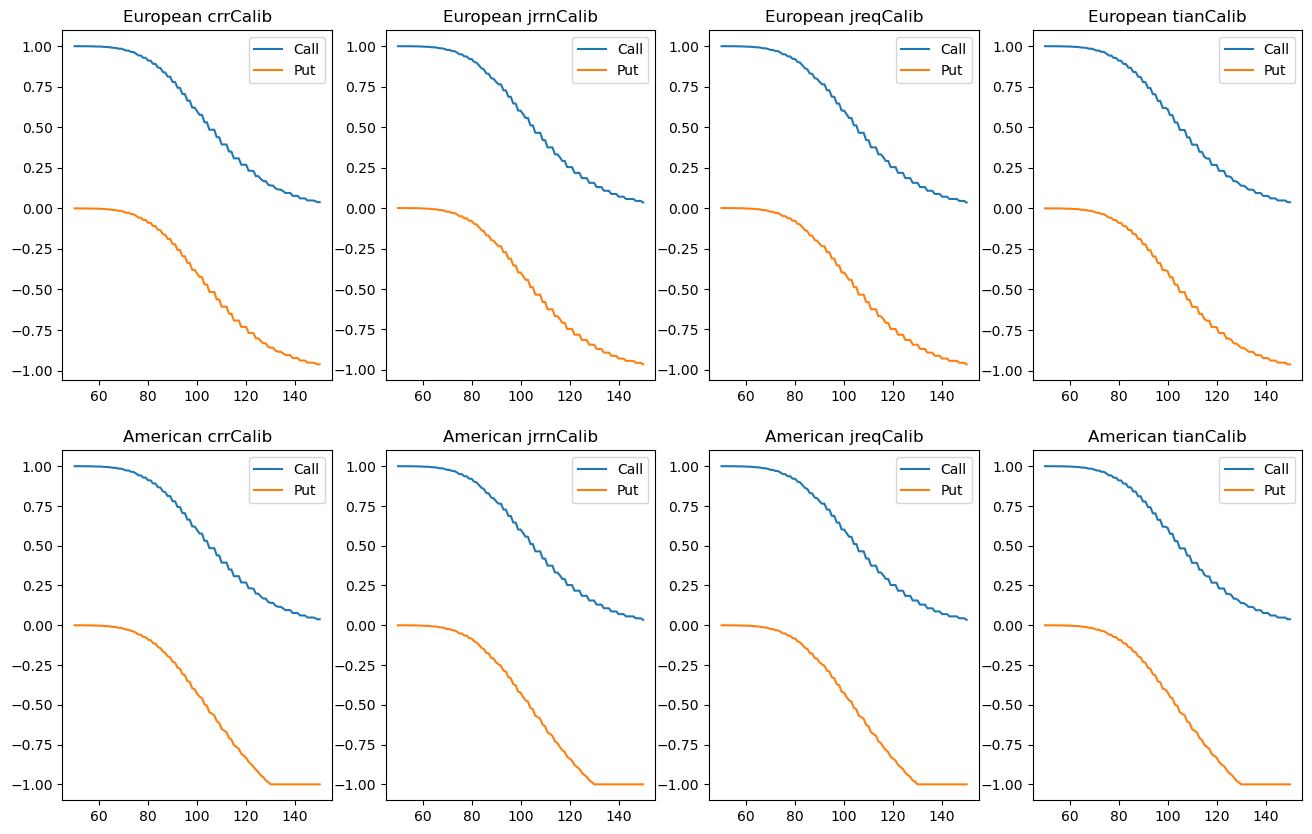

In [24]:
# Delta
data = outcomes[GreekType.Delta]
fig, axs = plt.subplots(2, 4, figsize = (16,10))

for i in range(2): 
    for j in range(4):
        title = cols[i*8+j].split()
        title = title[0]+' '+title[-1]
        axs[i, j].set_title(title)
        axs[i, j].plot(data[cols[i*8+j]],label="Call") 
        axs[i, j].plot(data[cols[i*8+j+4]],label="Put") 
        axs[i, j].legend()

>Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
### $ \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} , \Delta S=0.1\% \cdot S$

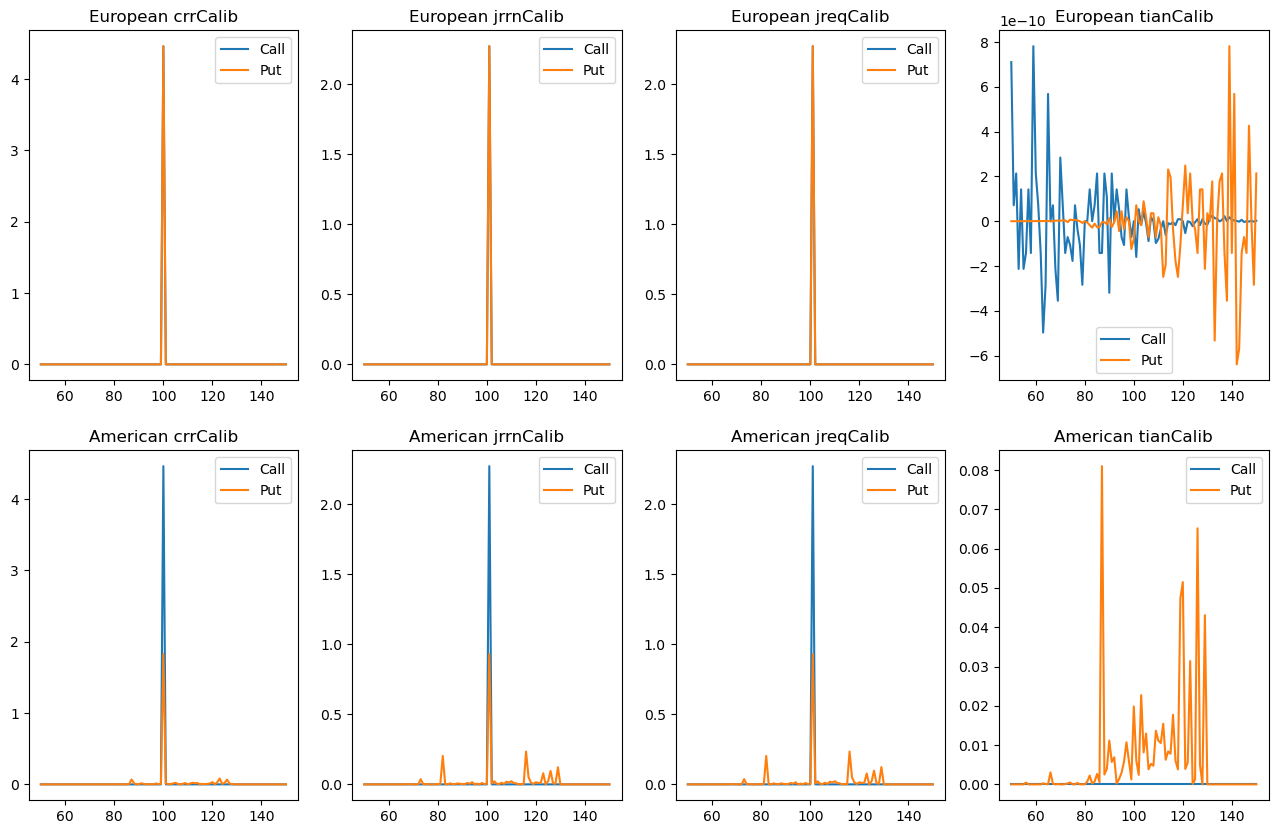

In [38]:
# Gamma
data = outcomes[GreekType.Gamma]
fig, axs = plt.subplots(2, 4, figsize = (16,10))
for i in range(2): 
    for j in range(4):
        title = cols[i*8+j].split()
        title = title[0]+' '+title[-1]
        axs[i, j].set_title(title)
        axs[i, j].plot(data[cols[i*8+j]],label="Call") 
        axs[i, j].plot(data[cols[i*8+j+4]],label="Put") 
        axs[i, j].legend()

> Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
### $ v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~ ,\Delta \sigma = 0.1\% $

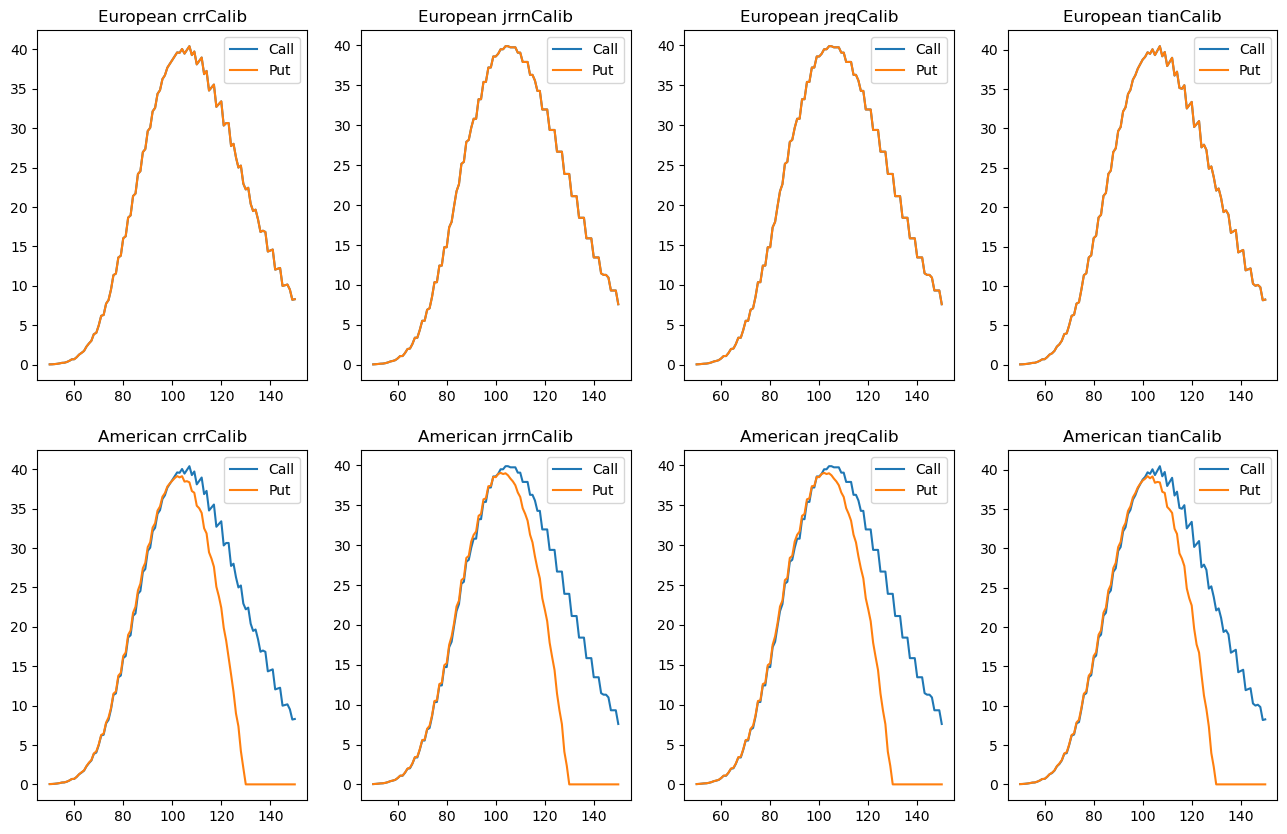

In [26]:
 # Vega
data = outcomes[GreekType.Vega]
fig, axs = plt.subplots(2, 4, figsize = (16,10))
for i in range(2): 
    for j in range(4):
        title = cols[i*8+j].split()
        title = title[0]+' '+title[-1]
        axs[i, j].set_title(title)
        axs[i, j].plot(data[cols[i*8+j]],label="Call") 
        axs[i, j].plot(data[cols[i*8+j+4]],label="Put") 
        axs[i, j].legend()

> Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
### $ \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~,\Delta t = 0.004 $

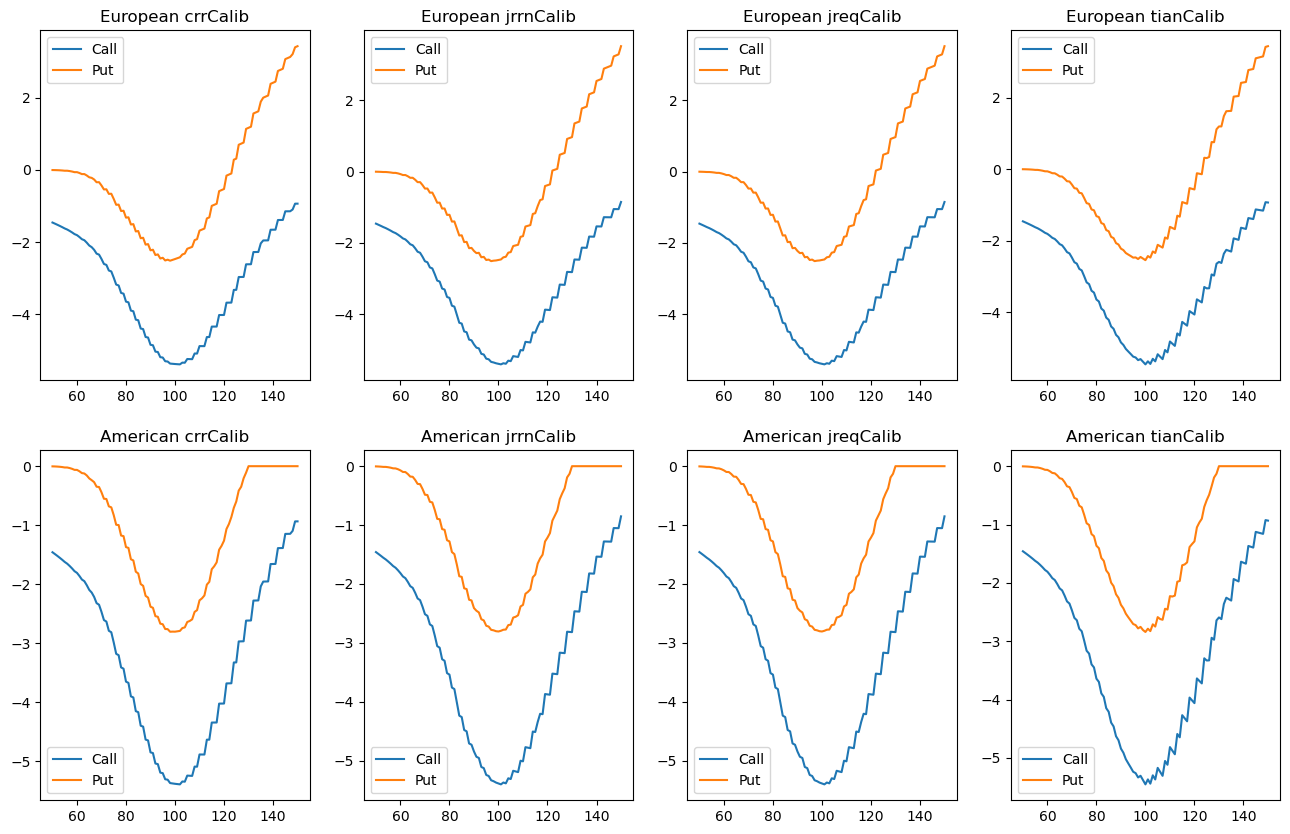

In [27]:
# Theta
data = outcomes[GreekType.Theta]
fig, axs = plt.subplots(2, 4, figsize = (16,10))
for i in range(2): 
    for j in range(4):
        title = cols[i*8+j].split()
        title = title[0]+' '+title[-1]
        axs[i, j].set_title(title)
        axs[i, j].plot(data[cols[i*8+j]],label="Call") 
        axs[i, j].plot(data[cols[i*8+j+4]],label="Put") 
        axs[i, j].legend()

> Rho: the rate of change in the price of an option in response to a change in the interest rate.
### $\rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~,\Delta r = 0.0001 $

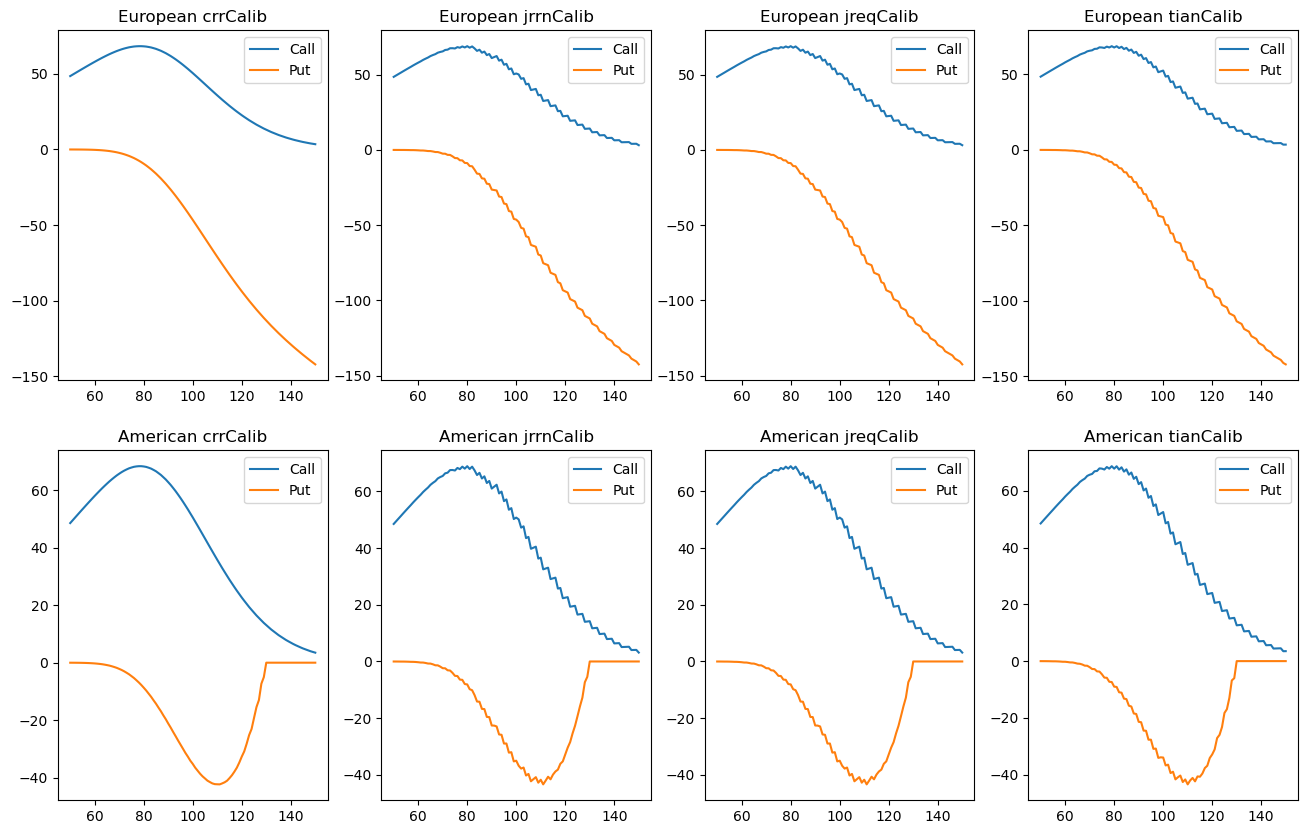

In [28]:
# Rho
data = outcomes[GreekType.Rho]
fig, axs = plt.subplots(2, 4, figsize = (16,10))
for i in range(2): 
    for j in range(4):
        title = cols[i*8+j].split()
        title = title[0]+' '+title[-1]
        axs[i, j].set_title(title)
        axs[i, j].plot(data[cols[i*8+j]],label="Call") 
        axs[i, j].plot(data[cols[i*8+j+4]],label="Put") 
        axs[i, j].legend()